In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# model version = V7

# GMD4, Kansas

In [16]:
gmd4_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD4_KS/KS_GMD4_netGW_pumping.csv')
gmd4_df

,year,netGW_mm,pumping_mm,lat,lon
0,2016,0.000000,0.00000,39.871724,-102.045921
1,2016,27.057457,0.00000,39.871724,-102.026158
2,2016,9.759896,0.00000,39.871724,-102.006395
3,2016,8.291942,0.00000,39.871724,-101.986633
4,2016,0.000000,0.00000,39.871724,-101.966870
...,...,...,...,...,...
17185,2020,14.797253,0.00000,39.021918,-100.247494
17186,2020,16.076336,0.00000,39.021918,-100.227731
17187,2020,26.763908,0.00000,39.021918,-100.207968
17188,2020,7.310449,0.00000,39.021918,-100.188205


## For all years

R2:  0.2963258149703035
RMSE:  31.263823822749764


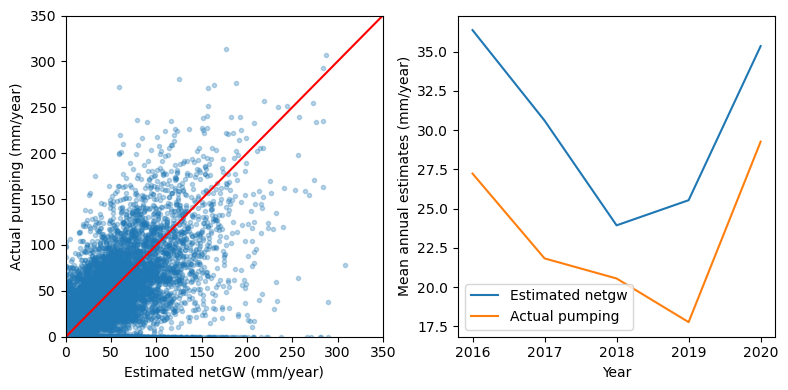

In [17]:
r2 = r2_score(gmd4_df.pumping_mm, gmd4_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(gmd4_df.pumping_mm, gmd4_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(gmd4_df.netGW_mm, gmd4_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 350)
ax[0].set_ylim(0, 350)

# annual mean
yearly_mean = gmd4_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.netGW_mm, label='Estimated netgw')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='lower left')

plt.tight_layout()

-------------------

# GMD3, Kansas

In [22]:
gmd3_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/GMD3_KS/KS_GMD3_netGW_pumping.csv')
gmd3_df

,year,netGW_mm,pumping_mm,lat,lon
0,2016,171.523830,0.000000,38.251163,-101.097300
1,2016,126.520790,0.000000,38.251163,-101.077537
2,2016,82.066734,0.000000,38.251163,-101.057775
3,2016,176.494490,0.000000,38.251163,-101.038012
4,2016,50.430008,43.345318,38.251163,-101.018249
...,...,...,...,...,...
28350,2020,0.000000,0.000000,37.006098,-100.445123
28351,2020,0.000000,0.000000,37.006098,-100.425361
28352,2020,0.000000,0.000000,37.006098,-100.405598
28353,2020,0.000000,0.000000,37.006098,-100.385835


R2:  0.5186564264818841
RMSE:  63.14688800125829


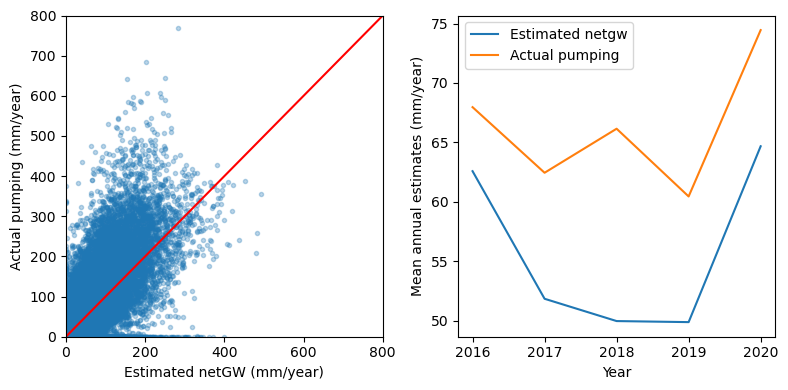

In [23]:
r2 = r2_score(gmd3_df.pumping_mm, gmd3_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(gmd3_df.pumping_mm, gmd3_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(gmd3_df.netGW_mm, gmd3_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean
yearly_mean = gmd3_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.netGW_mm, label='Estimated netgw')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

plt.tight_layout()

## netGW conversion to pumping

R2:  0.5224041024040925
RMSE:  62.900581074226345


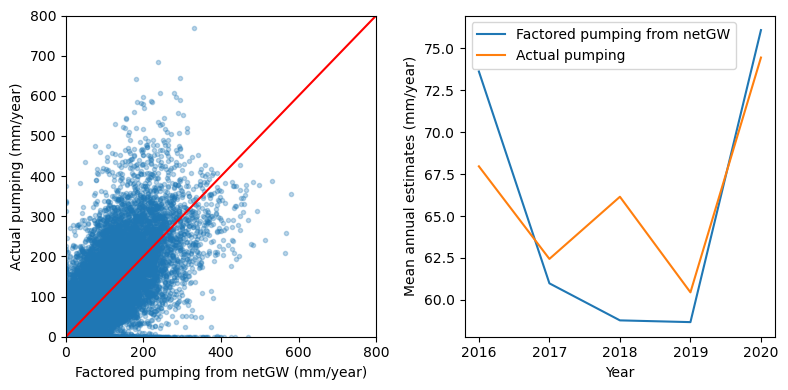

In [24]:
gmd3_df['factored_pumping'] = gmd3_df['netGW_mm'] /0.85

r2 = r2_score(gmd3_df.pumping_mm, gmd3_df.factored_pumping)
print('R2: ', r2)

rmse = mean_squared_error(gmd3_df.pumping_mm, gmd3_df.factored_pumping, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(gmd3_df.factored_pumping, gmd3_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Factored pumping from netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean
yearly_mean = gmd3_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.factored_pumping, label='Factored pumping from netGW')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

plt.tight_layout()

# RPB, Colorado

In [30]:
rpb_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/RPB_CO/CO_RPB_netGW_pumping.csv')
rpb_df

,year,netGW_mm,pumping_mm,lat,lon
0,2016,0.000000,0.000000,40.958685,-102.085447
1,2016,65.605170,0.000000,40.958685,-102.065684
2,2016,15.273835,0.000000,40.938922,-102.144736
3,2016,28.504807,24.034082,40.938922,-102.124973
4,2016,0.000000,0.000000,40.938922,-102.105210
...,...,...,...,...,...
30560,2020,0.000000,0.000000,38.666185,-102.144736
30561,2020,0.000000,0.000000,38.666185,-102.124973
30562,2020,0.000000,0.000000,38.666185,-102.105210
30563,2020,0.000000,0.000000,38.666185,-102.085447


## For all years

R2:  0.45945959464534036
RMSE:  42.66147696389018


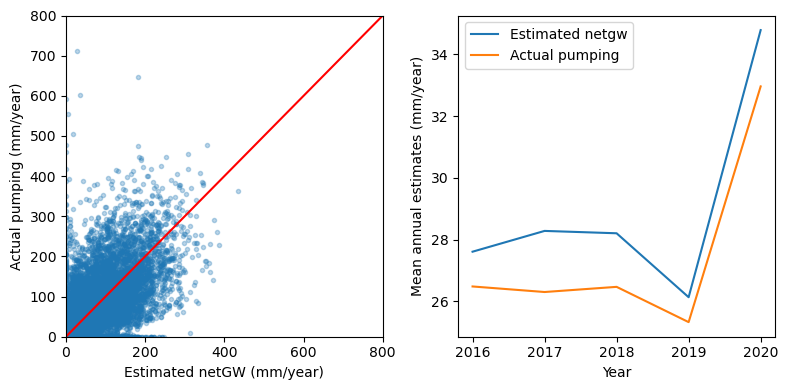

In [31]:
r2 = r2_score(rpb_df.pumping_mm, rpb_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(rpb_df.pumping_mm, rpb_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot
ax[0].scatter(rpb_df.netGW_mm, rpb_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 800)
ax[0].set_ylim(0, 800)

# annual mean
yearly_mean = rpb_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[1].plot(yearly_mean.year, yearly_mean.netGW_mm, label='Estimated netgw')
ax[1].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[1].set_xticks(yearly_mean.year)
ax[1].set_ylabel('Mean annual estimates (mm/year)')
ax[1].set_xlabel('Year')
ax[1].legend(loc='upper left')

plt.tight_layout()

# Harquahala INA, Arizona

In [39]:
hqr_df = pd.read_csv('../../Data_main/Raster_data/NetGW_irrigation/Harquahala_INA_AZ/AZ_Harquahala_INA_netGW_pumping_updated.csv')
hqr_df

,year,netGW_mm,pumping_mm,lat,lon,pumping_extracted_mm
0,2016,0.0,0.0,33.824265,-113.310795,0.000000
1,2016,0.0,0.0,33.804502,-113.370084,4.928915
2,2016,0.0,0.0,33.804502,-113.350321,0.003111
3,2016,0.0,0.0,33.804502,-113.330558,0.003108
4,2016,0.0,0.0,33.804502,-113.310795,0.000000
...,...,...,...,...,...,...
2436,2020,0.0,0.0,33.290666,-113.053877,0.002222
2437,2020,0.0,0.0,33.290666,-113.034114,0.002126
2438,2020,0.0,0.0,33.270903,-113.231743,0.000000
2439,2020,0.0,0.0,33.270903,-113.093403,0.000000


Comparing pumping vs netGW
R2:  0.4185320058645936
RMSE:  135.87977097057535
Comparing pumping vs pumping from Majumdar et al. 2022
R2:  0.3358088297613213
RMSE:  99.55717511731063


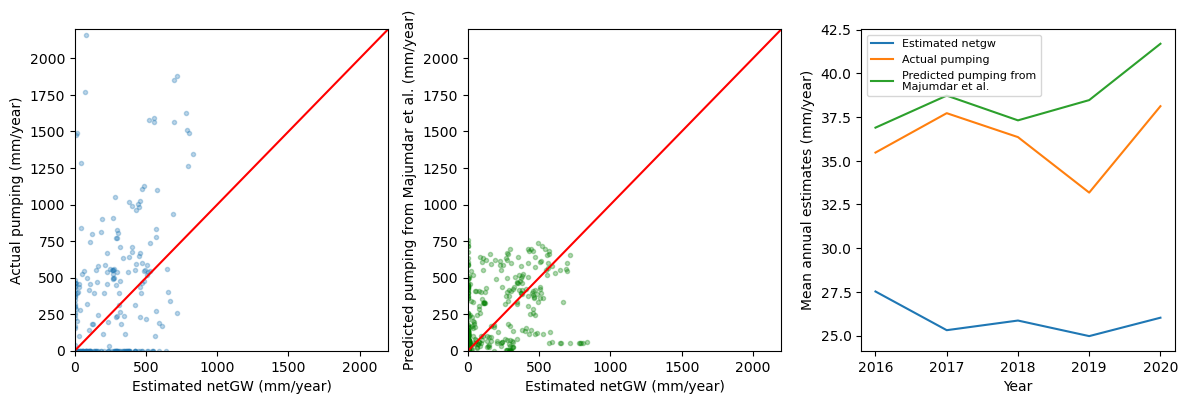

In [40]:
print('Comparing pumping vs netGW')
r2 = r2_score(hqr_df.pumping_mm, hqr_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(hqr_df.pumping_mm, hqr_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

print('Comparing pumping vs pumping from Majumdar et al. 2022')
r2 = r2_score(hqr_df.pumping_extracted_mm, hqr_df.netGW_mm)
print('R2: ', r2)

rmse = mean_squared_error(y_true=hqr_df.pumping_extracted_mm, y_pred=hqr_df.netGW_mm, squared=False)
print('RMSE: ', rmse)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# scatter plot 1
ax[0].scatter(hqr_df.netGW_mm, hqr_df.pumping_mm, alpha=0.3, marker='.')
ax[0].set_ylabel('Actual pumping (mm/year)')
ax[0].set_xlabel('Estimated netGW (mm/year)')
ax[0].plot([0, 1], [0, 1], '-r', transform=ax[0].transAxes)
ax[0].set_xlim(0, 2200)
ax[0].set_ylim(0, 2200)

# scatter plot 2
# pumping_extracted_mm is from Majumdar et al. 2022
ax[1].scatter(hqr_df.netGW_mm, hqr_df.pumping_extracted_mm, alpha=0.3, marker='.', color='green')
ax[1].set_ylabel('Predicted pumping from Majumdar et al. (mm/year)')
ax[1].set_xlabel('Estimated netGW (mm/year)')
ax[1].plot([0, 1], [0, 1], '-r', transform=ax[1].transAxes)
ax[1].set_xlim(0, 2200)
ax[1].set_ylim(0, 2200)

# annual mean
yearly_mean = hqr_df.groupby('year').mean()
yearly_mean = yearly_mean.reset_index()

ax[2].plot(yearly_mean.year, yearly_mean.netGW_mm, label='Estimated netgw')
ax[2].plot(yearly_mean.year, yearly_mean.pumping_mm, label='Actual pumping')
ax[2].plot(yearly_mean.year, yearly_mean.pumping_extracted_mm, label='Predicted pumping from' + '\n' + 'Majumdar et al.')
ax[2].set_xticks(yearly_mean.year)
ax[2].set_ylabel('Mean annual estimates (mm/year)')
ax[2].set_xlabel('Year')
ax[2].legend(loc='upper left', fontsize=8)

plt.tight_layout()

In [41]:
yearly_mean['efficiency'] =  yearly_mean['netGW_mm']  / yearly_mean['pumping_mm']
yearly_mean

,year,netGW_mm,pumping_mm,lat,lon,pumping_extracted_mm,efficiency
0,2016,27.528530,35.467625,33.551999,-113.285443,36.892028,0.776159
1,2017,25.317411,37.719204,33.551999,-113.285443,38.724211,0.671207
2,2018,25.868697,36.350993,33.551999,-113.285443,37.308406,0.711637
3,2019,24.978930,33.180191,33.551999,-113.285443,38.466228,0.752827
4,2020,26.030596,38.118324,33.551585,-113.285172,41.685774,0.682889
